# 🎵 Song Recommendation System

This project builds a content-based music recommender using audio features from songs. We use clustering and PCA to group similar songs and recommend others based on a selected track. The system helps users discover new songs that match their preferences.


In [1]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('data/spotify_tracks.csv')
df.head()


,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


## 🔍 Exploratory Data Analysis (EDA)

Here we explore the dataset to understand its structure and contents. We analyze features like popularity, duration, and tempo to identify trends and clean or prepare the data for modeling.


In [2]:
# Dataset shape and info
print(f"Shape of the dataset: {df.shape}\n")

# Column names
print("Column names:\n", df.columns.tolist(), "\n")

# Info about datatypes and non-null values
df.info()


Shape of the dataset: (6300, 8)

Column names:
 ['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms', 'explicit'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


In [3]:
# Summary statistics for numerical features
df.describe()


,popularity,duration_ms
count,6300.000000,6.300000e+03
mean,30.754762,2.028477e+05
std,19.948991,1.210299e+05
min,0.000000,3.006000e+04
25%,16.000000,1.476870e+05
50%,29.000000,1.916070e+05
75%,45.000000,2.369625e+05
max,90.000000,3.601658e+06


In [4]:
#Summary statistics
df.describe(include='all')


,id,name,genre,artists,album,popularity,duration_ms,explicit
count,6300,6300,6300,6300,6300,6300.000000,6.300000e+03,6300
unique,6187,4518,126,4651,4949,NaN,NaN,2
top,1OG1NoKpZZLrMqMYCk9m84,Kids,acoustic,Metallica,Bach & Friends,NaN,NaN,False
freq,3,26,50,22,20,NaN,NaN,5106
mean,NaN,NaN,NaN,NaN,NaN,30.754762,2.028477e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,19.948991,1.210299e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,3.006000e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,16.000000,1.476870e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,1.916070e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,45.000000,2.369625e+05,NaN


In [5]:
# Total missing values per column
df.isnull().sum()


id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

C:\Users\Lydia\AppData\Local\Temp\ipykernel_3548\2924591191.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


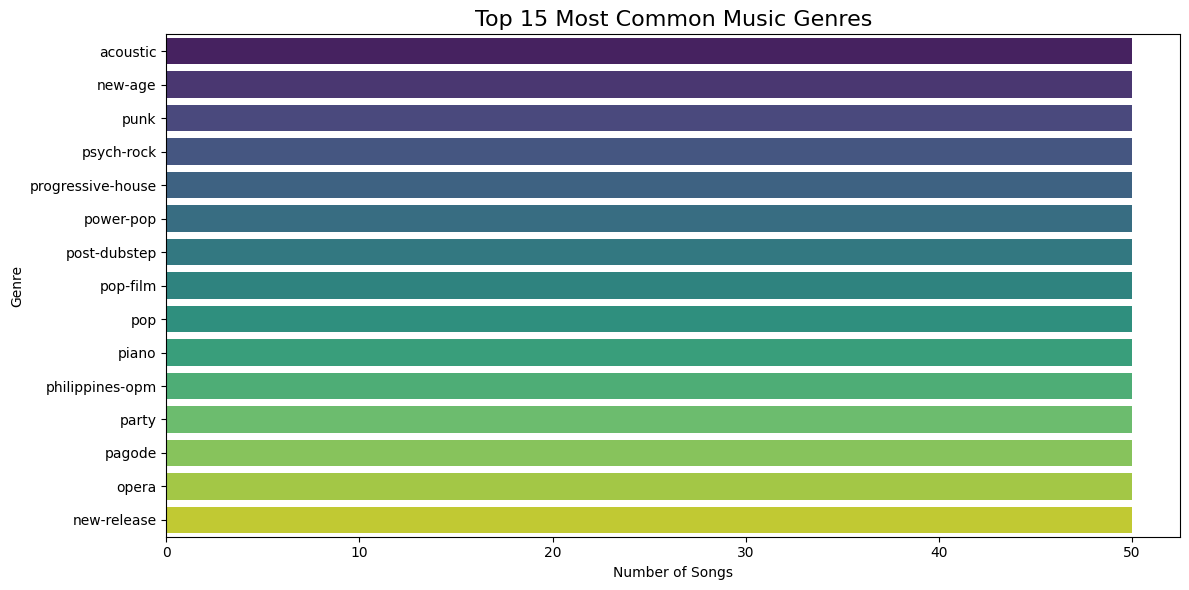

In [6]:
#Plot Genre Distribution (Top 15 Genres)
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12,6))

# Count top 15 genres
top_genres = df['genre'].value_counts().head(15)

# Plot
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 15 Most Common Music Genres", fontsize=16)
plt.xlabel("Number of Songs")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


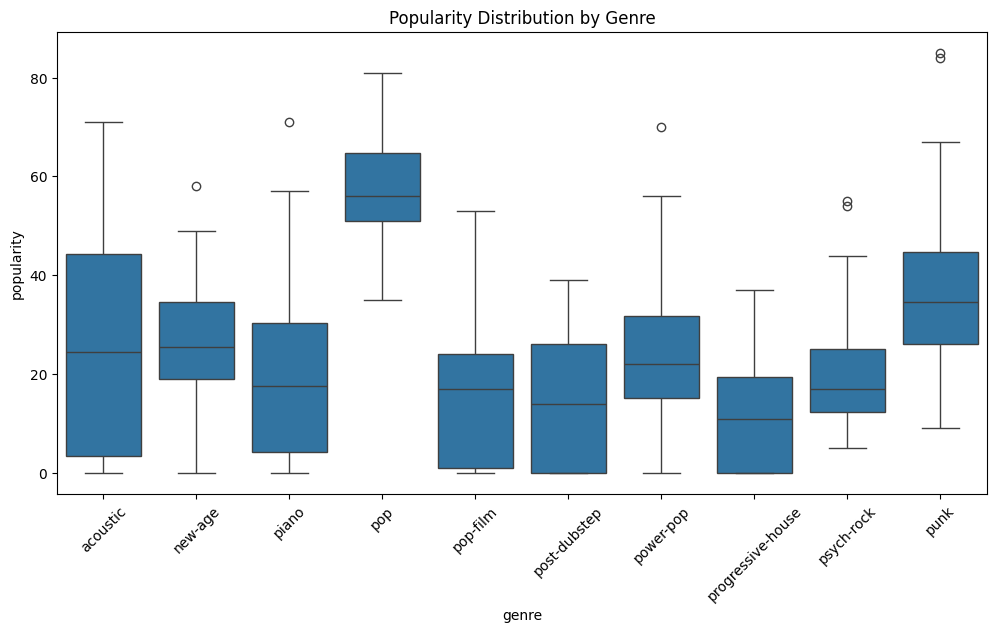

In [7]:
#Genre-wise Average Tempo or Energy
import matplotlib.pyplot as plt
import seaborn as sns

top_genres = df['genre'].value_counts().head(10).index
genre_data = df[df['genre'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='popularity', data=genre_data)
plt.title("Popularity Distribution by Genre")
plt.xticks(rotation=45)
plt.show()


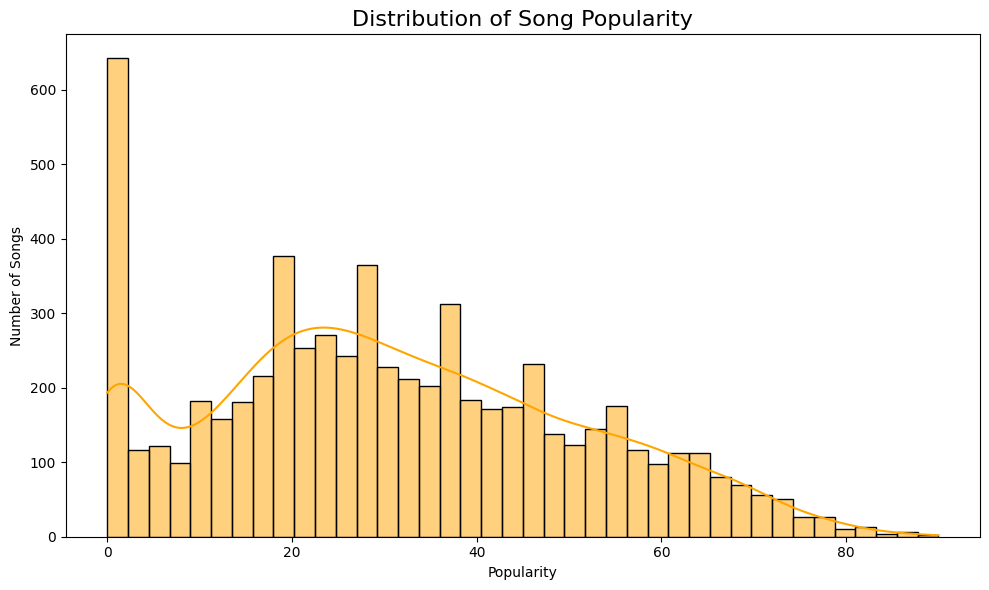

In [8]:
#"popular" vs. "underrated."
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=40, kde=True, color='orange')
plt.title("Distribution of Song Popularity", fontsize=16)
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()


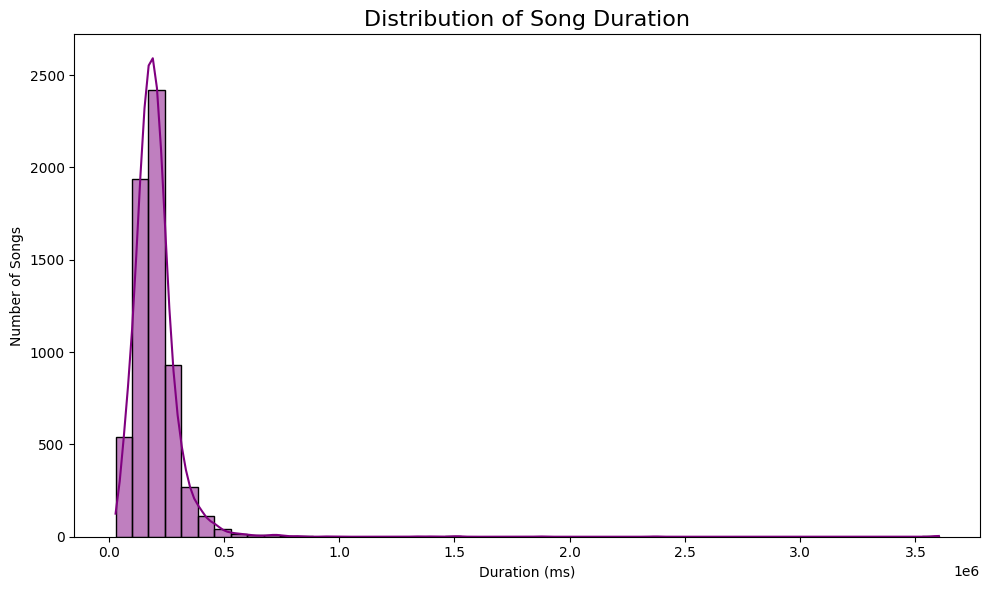

In [9]:
#Distribution of song lengths (in milliseconds)
plt.figure(figsize=(10,6))
sns.histplot(df['duration_ms'], bins=50, kde=True, color='purple')
plt.title("Distribution of Song Duration", fontsize=16)
plt.xlabel("Duration (ms)")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()


In [10]:
#Dealing with outliers
# Checking summary statistics
df['duration_ms'].describe()

# Defining reasonable range for typical songs
min_dur = 30000    # 30 seconds
max_dur = 600000   # 10 minutes

# Filtering unused data
df_cleaned = df[(df['duration_ms'] >= min_dur) & (df['duration_ms'] <= max_dur)]

print(f"Original count: {len(df)}")
print(f"Cleaned count: {len(df_cleaned)}")


Original count: 6300
Cleaned count: 6268


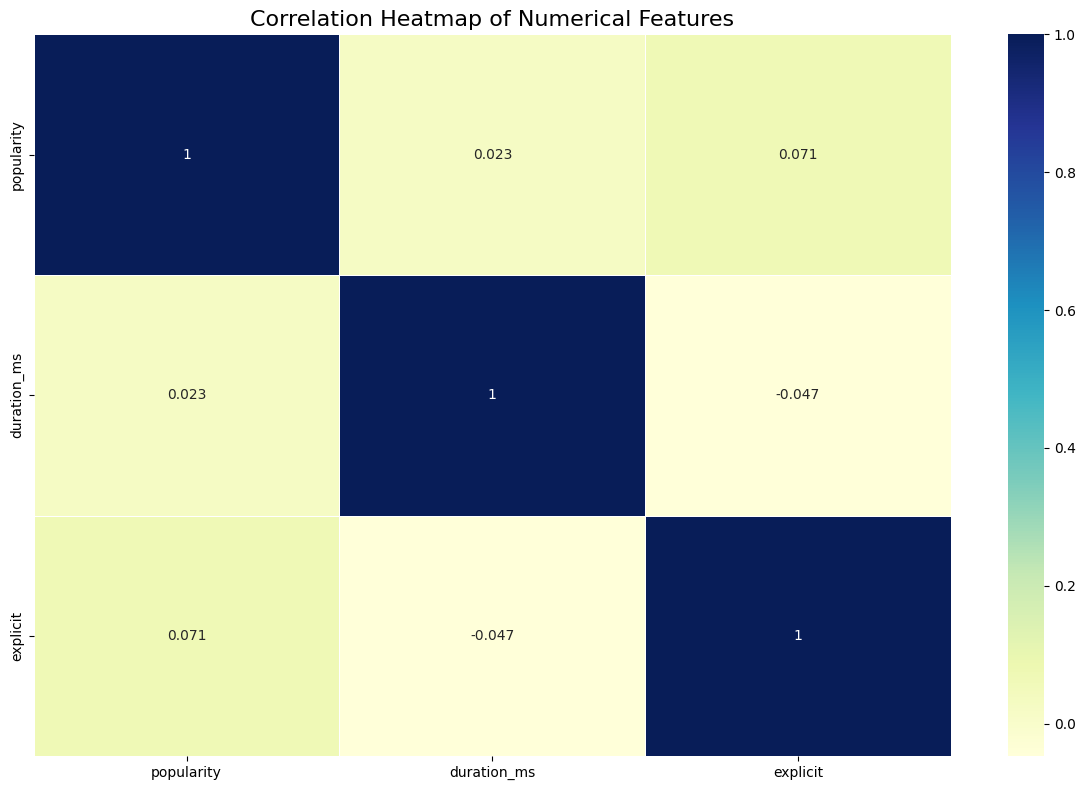

In [11]:
#Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Lydia\AppData\Local\Temp\ipykernel_3548\1546855492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='explicit', palette='mako')


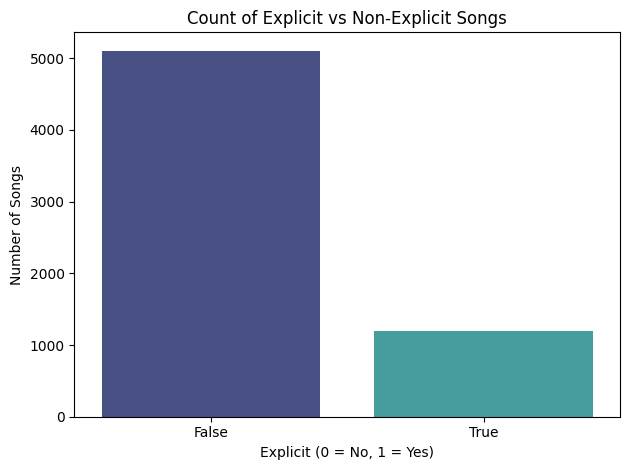

In [12]:
#Distribution of Explicit Songs
sns.countplot(data=df, x='explicit', palette='mako')
plt.title("Count of Explicit vs Non-Explicit Songs")
plt.xlabel("Explicit (0 = No, 1 = Yes)")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()


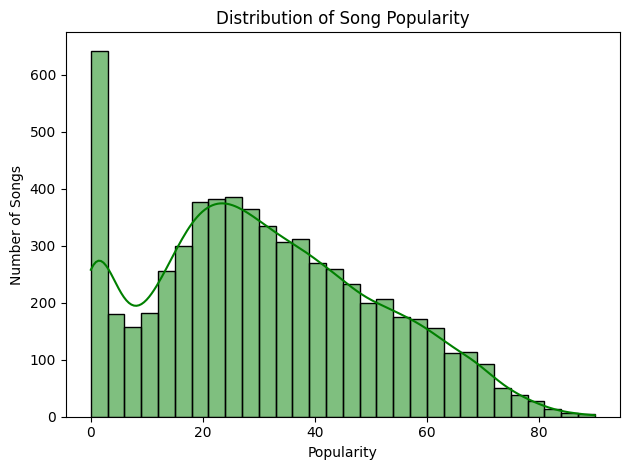

In [13]:
#Popularity Distribution
sns.histplot(df['popularity'], kde=True, bins=30, color='green')
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()


## ⚖️ Feature Scaling and  One-Hot Encoding 

We scale the numerical features using StandardScaler to ensure all variables contribute equally to clustering and PCA. This is a crucial step before applying machine learning algorithms like KMeans or PCA.

To prepare the dataset for clustering, we first perform one-hot encoding on the categorical features `genre` and `explicit`. This converts them into numerical columns. Then, we scale the numerical features (`popularity`, `duration_ms`, and encoded columns) using `StandardScaler` to ensure all features contribute equally during clustering.


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Select numerical features only (adjust based on your actual columns)
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Optional: Drop identifier or irrelevant columns like 'id' or 'song_name' if they exist
numerical_features = numerical_features.drop(columns=['track_id', 'song_name'], errors='ignore')

# Step 2: Handle missing values if any
numerical_features = numerical_features.dropna()

# Step 3: Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Optional: Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Show the first few rows of the scaled data
scaled_df.head()


,popularity,duration_ms
0,1.365854,-0.253253
1,1.315722,-0.253228
2,0.563744,-0.479769
3,0.764272,-0.712895
4,0.112558,-0.569539


## 🔹 KMeans Clustering

We apply the KMeans algorithm to group similar songs into clusters based on the scaled features. Each song is assigned a cluster label, which represents a group of songs with similar characteristics. This helps us identify patterns and categories in the music dataset.


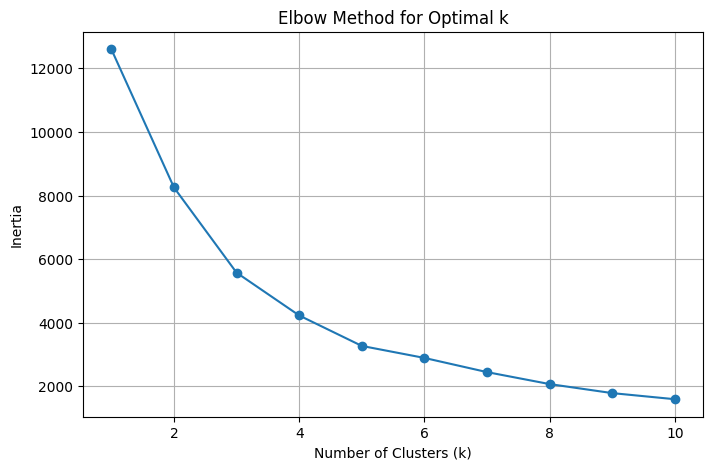

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Use the Elbow Method to find optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Step 2: Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


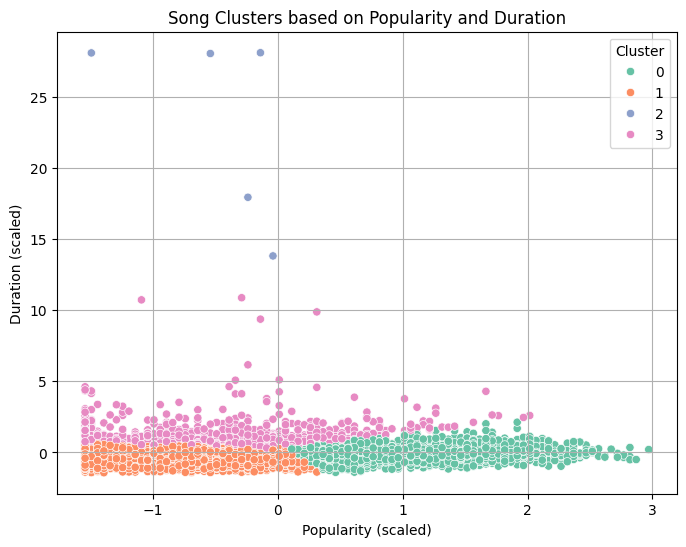

In [16]:
# Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original DataFrame
df_clustered = df.copy()
df_clustered['Clusters'] = clusters

# Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_df.iloc[:, 0],  # x = scaled popularity
    y=scaled_df.iloc[:, 1],  # y = scaled duration_ms
    hue=clusters,
    palette='Set2'
)
plt.title('Song Clusters based on Popularity and Duration')
plt.xlabel('Popularity (scaled)')
plt.ylabel('Duration (scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [17]:
#Displaying clustered dataset
df_clustered

,id,name,genre,artists,album,popularity,duration_ms,explicit,Clusters
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False,0
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False,0
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False,0
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False,0
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False,1
...,...,...,...,...,...,...,...,...,...
6295,4uveHSzaz8YEbTF9j6QlCI,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False,1
6296,4u15cjyziW2Ewn5Ek3082l,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False,3
6297,56pHPaTeX2O9aVmTFYS8hV,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False,1
6298,6Ldyc5TsR4kaUsuHKcB2AD,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False,1


In [18]:
# See how many songs are in each cluster
df_clustered['Clusters'].value_counts()


Clusters
1    2996
0    2415
3     884
2       5
Name: count, dtype: int64

In [19]:
# Example: View songs in Cluster 0
df_clustered[df_clustered['Clusters'] == 0].head()


,id,name,genre,artists,album,popularity,duration_ms,explicit,Clusters
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False,0
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False,0
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False,0
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False,0
9,64zEnxASl3epPAIH4MsmSw,Acoustic Energy Vibrations,acoustic,"Healing Solfeggio Frequencies, Harmony Touch",528: Mind & Body Healing,45,118331,False,0


In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# One-hot encode 'genre' and 'explicit'
df_encoded = pd.get_dummies(df[['genre', 'explicit']], drop_first=True)

# Select numeric features and scale them
features = pd.concat([df[['popularity', 'duration_ms']], df_encoded], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [21]:
#Encoded and scaled data structure shape
print("Encoded and scaled feature shape:", scaled_features.shape)


Encoded and scaled feature shape: (6300, 128)


In [22]:
from sklearn.cluster import KMeans

kmeans_full = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans_full.fit_predict(scaled_features)


In [23]:
#Creating cluster labels as clusters column
df['Clusters'] = cluster_labels


In [24]:
#Aggregating the clusters
df.groupby('Clusters')[['popularity', 'duration_ms']].mean()


,popularity,duration_ms
Clusters,,
0,47.683333,196353.556667
1,33.740000,189101.675385
2,35.732426,185644.424036
3,27.582426,213780.944081
4,45.886667,222395.850000
5,18.990654,176860.443258
6,20.082447,240636.582447
7,13.100000,276473.250000
8,27.028148,173892.121481


## 🧬 Principal Component Analysis (PCA)

PCA reduces the high-dimensional feature space to 2 dimensions for easy visualization. PCA helps simplify the data without losing important structure. It helps us visualize how songs are grouped based on similarity, even though clustering may still occur in higher dimensions.

## 🎯 Grouping Songs Based on PCA Components

Instead of using clustering, we rely on PCA-transformed components to find songs that are grouped together in the reduced 2D space. Songs close together in PCA space are treated as similar.

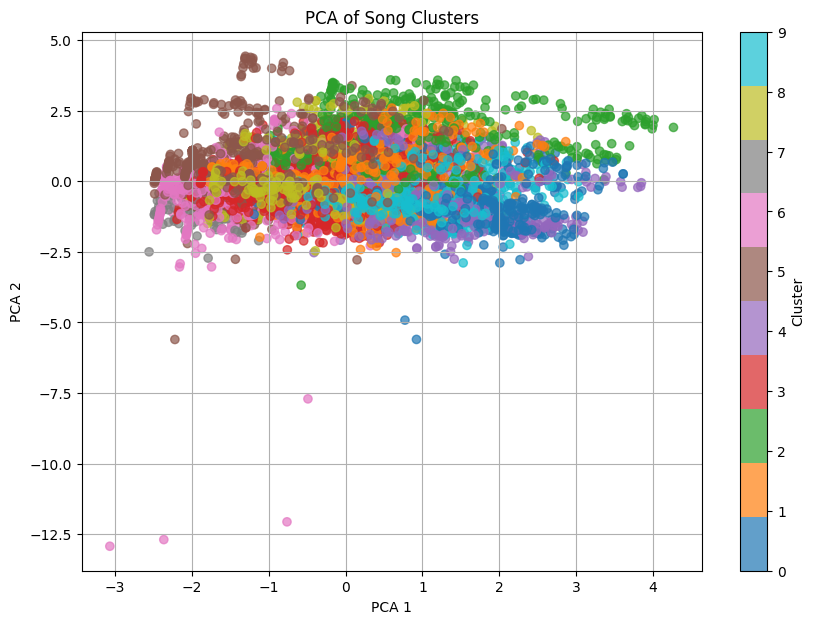

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Clusters'], cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('PCA of Song Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


## 🤖 Cluster-Based Song Recommendation System

We define a function that recommends songs similar to a given track. 
It identifies the cluster (or PCA group) of the input song and returns other 
songs from the same group, assuming they have similar audio features.

In [26]:
# Normalizing 'name' column 
df_clustered['name'] = df_clustered['name'].str.strip().str.lower()

# Song recommendation
def recommend_songs_from_cluster(song_name, df, n_recommendations=5):
    song_name = song_name.strip().lower()
    
    if song_name not in df['name'].values:
        print("Song not found in the dataset.")
        return

    cluster = df[df['name'] == song_name]['Clusters'].values[0]  # updated column name
    print(f"'{song_name}' belongs to Cluster {cluster}.")

    similar_songs = df[(df['Clusters'] == cluster) & (df['name'] != song_name)]
    recommendations = similar_songs.sample(n=min(n_recommendations, len(similar_songs)))

    display(recommendations[['name', 'artists', 'popularity', 'duration_ms']])

# Example call
recommend_songs_from_cluster("l'oiseau", df_clustered)


'l'oiseau' belongs to Cluster 3.


,name,artists,popularity,duration_ms
3953,pure binaural,"New Age, New Age Instrumental Music, New Age 2021",26,301250
5445,i'm the only one,Melissa Etheridge,4,294013
1152,symbolic,Death,47,392800
3900,m.p.b.,Womack & Womack,32,238066
6219,work out,"Jvcki Wai, Kid Milli, NO:EL, YANGHONGWON, Swings",26,251654


## 🎛️ Interactive Recommendation using Dropdown

We create an interactive dropdown menu using `ipywidgets` that allows the user to select a song and get recommendations instantly. This improves usability without having to re-run the function manually each time.

In [27]:
#Widget Interaction 
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dropdown widget with song names
dropdown = widgets.Dropdown(
    options=df_clustered['name'].unique(),
    description='Select Song:',
    layout=widgets.Layout(width='50%')
)

# Button widget
button = widgets.Button(
    description='Recommend Songs',
    button_style='success',
    layout=widgets.Layout(width='30%')
)

# Output widget
output = widgets.Output()

# Callback function
def on_button_click(b):
    with output:
        clear_output()
        recommend_songs_from_cluster(dropdown.value, df_clustered)

# Link button to callback
button.on_click(on_button_click)

# Display widgets
display(widgets.VBox([dropdown, button, output]))